In [1]:
!pip install pandas

In [2]:
import pandas as pd
print(pd.__version__)

2.2.2


In [3]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)\r\n0001,Male,19,15,39\r\n0002,Male,21,15,81\r\n0003,Female,20,16,6\r\n0004,Female,23,16,77\r\n0005,Female,31,17,40\r\n0006,Female,22,17,76\r\n0007,Female,35,18,6\r\n0008,Female,23,18,94\r\n0009,Male,64,19,3\r\n0010,Female,30,19,72\r\n0011,Male,67,19,14\r\n0012,Female,35,19,99\r\n0013,Female,58,20,15\r\n0014,Female,24,20,77\r\n0015,Male,37,20,13\r\n0016,Male,22,20,79\r\n0017,Female,35,21,35\r\n0018,Male,20,21,66\r\n0019,Male,52,23,29\r\n0020,Female,35,23,98\r\n0021,Male,35,24,35\r\n0022,Male,25,24,73\r\n0023,Female,46,25,5\r\n0024,Male,31,25,73\r\n0025,Female,54,28,14\r\n0026,Male,29,28,82\r\n0027,Female,45,28,32\r\n0028,Male,35,28,61\r\n0029,Female,40,29,31\r\n0030,Female,23,29,87\r\n0031,Male,60,30,4\r\n0032,Female,21,30,73\r\n0033,Male,53,33,4\r\n0034,Male,18,33,92\r\n0035,Female,49,33,14\r\n0036,Female,21,33,81\r\n0037,Female,42,34,17\r\n0038,Female,30,34,73\r\n0039,Female,36,37,26\r\n0040,Female

In [4]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [5]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=StandardScaler()
df['Age_Scaled']=scaler.fit_transform(df[['Age']])
df['Income_Scaled']=scaler.fit_transform(df[['Annual Income (k$)']])

In [15]:
scaler=MinMaxScaler()
df['Score_Scaled']=scaler.fit_transform(df[['Spending Score (1-100)']])

In [17]:
df['Genre']=df['Genre'].map({'Male':1,'Female':0})

In [18]:
print(df.head())

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1      1   19                  15                      39   
1           2      1   21                  15                      81   
2           3      0   20                  16                       6   
3           4      0   23                  16                      77   
4           5      0   31                  17                      40   

   Age_Scaled  Income_Scaled  Score_Scaled  
0   -1.424569      -1.738999      0.387755  
1   -1.281035      -1.738999      0.816327  
2   -1.352802      -1.700830      0.051020  
3   -1.137502      -1.700830      0.775510  
4   -0.563369      -1.662660      0.397959  


In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [20]:
x=df[['Age_Scaled','Income_Scaled','Score_Scaled','Genre','CustomerID']]

In [ ]:
inertia=[]
for k in range(1,11):
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(x)
  inertia.append(km.inertia_)
plt.plot(range(1,11),inertia,marker='0')
plt.xlabel('Numbers of Clusters (K)')
plt.ylabel('Inertia')
plt.title("Elbow Method")
plt.show()


In [21]:
inertia=[]
for k in range(1,11):
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(x)
  inertia.append(km.inertia_)


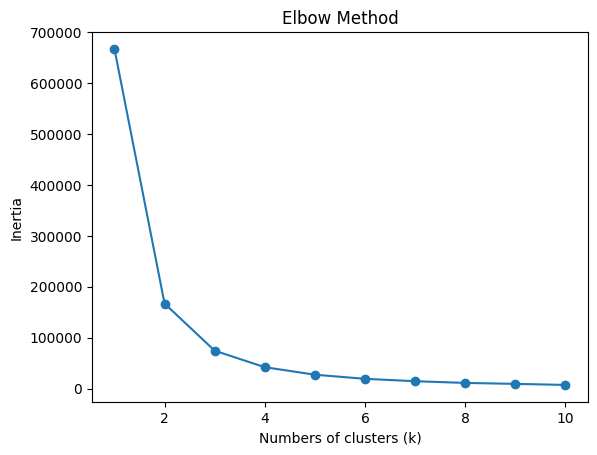

In [22]:
plt.plot(range(1,11),inertia, marker='o')
plt.xlabel("Numbers of clusters (k)")
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [23]:
kmeans=KMeans(n_clusters=5,random_state=42)
df['Clusters']=kmeans.fit_predict(x)

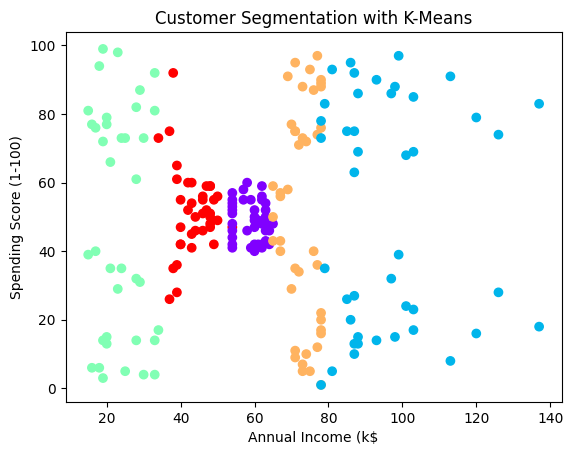

In [24]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Clusters'],cmap='rainbow')
plt.xlabel('Annual Income (k$')
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation with K-Means")
plt.show()


